<center><h1>Técnicas de Inteligencia Artificial</header1></center>

Presentado por: José Andres Ruiz Sarauz  <br>
Fecha: 18/07/2022

# Importación de librerias necesarias

In [69]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np

#Importación de la libreria sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Se realiza la importación de la libreria statsmodels
import statsmodels.api as smi

#Importación de la libreria para la regresión lineal
from sklearn.linear_model import LinearRegression 

#Importación de la libreria para la parte grafica
import matplotlib.pyplot as plt

## Cargar el Dataset

In [49]:
#Código para cargar Dataset

#Se cargan los datos del dataset mediante la libreria pandas
df = pd.read_csv("Real estate.csv")

#Se visualiza los datos
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Descripción de la fuente del Dataset

Análisis de regresión, regresión múltiple, regresión lineal, predicción.

Link del dataset: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction

In [50]:
#La descripción del dataset
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Explique el problema a resolver. 

En este conjunto de datos se visualiza el costo de las medidas de bienes y raices que se debe llevar un control de precios por los terrenos que se tiene como variable dependiente "y" el indicador del precio de la unidad de superficie  y algunas variables explicativas las "x" correspondientes a los otros datos obtenidos. Por lo tanto, se pretende solucionar el problema predicciendo los precios de las inmobiliarias sin que se exceda los costos de venta. El presente trabajo tiene por objetivo minimizar el error de pronóstico en la predicción de precios-venta en cada uno de los tipos de inmueble y operaciones inmobiliarias existentes en el mercado.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [51]:
#Código que responde a la descripción anterior

#conteo registros del dataset
df.count()

No                                        414
X1 transaction date                       414
X2 house age                              414
X3 distance to the nearest MRT station    414
X4 number of convenience stores           414
X5 latitude                               414
X6 longitude                              414
Y house price of unit area                414
dtype: int64

In [52]:
#muestra la información de los 6 atributos de entrada.
df.drop('Y house price of unit area', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


<AxesSubplot:>

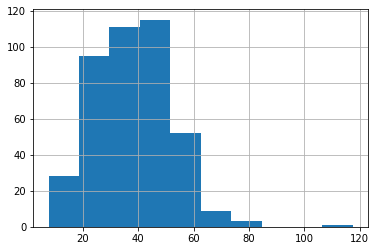

In [55]:
%matplotlib inline
#Creación del gráfico de barras como la variable objetivo (tipo) continua
df['Y house price of unit area'].hist()

En un par de párrafos haga un resumen de los principales hallazagos encontrados:  
Con el dataset que se trabaja se muestra la cantidad de datos de los pacientes de los medicos que han sido atendidos. Se ha transformado los datos categoricos y obteniendo el resultado de la cifra de las regiones que son los pacientes, la cantidad que consumen tabaco entre otros datos.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [56]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)

# Variable objetivo y variables de entrada
VariableObjetivo=['Y house price of unit area']
VariablesEntrada=['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

In [57]:
X=df[VariablesEntrada].values
y=df[VariableObjetivo].values

In [58]:
### Estandarización de la data ###
from sklearn.preprocessing import StandardScaler
VariablesEntradaScaler=StandardScaler()
VariableObjetivoScaler=StandardScaler()

In [61]:
#Almacenamiento del objeto de ajuste para referencia posterior
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

In [62]:
#Generación de los valores estandarizados de X e y
X=VariablesEntradaFit.transform(X)
y=VariableObjetivoFit.transform(y)

## División del dataset en datos de entrenamiento y datos de test 

In [70]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [71]:
#Impresion de y de prueba
print(y_test)

[[-0.78588359]
 [ 1.20822315]
 [-1.17587495]
 [-1.94114101]
 [ 0.54597368]
 [-1.10229167]
 [-1.1905916 ]
 [-0.42532555]
 [-0.04269252]
 [-1.13172498]
 [-1.51435801]
 [-0.08684248]
 [-1.09493335]
 [-0.07948416]
 [ 1.34803137]
 [-1.25681655]
 [ 0.40616546]
 [ 0.17069898]
 [-0.75645028]
 [ 0.30314887]
 [ 0.63427361]
 [-1.1905916 ]
 [ 0.00881577]
 [ 1.15671486]
 [ 1.40689799]
 [-0.83739188]
 [-0.43268387]
 [ 1.38482301]
 [ 0.37673215]
 [-1.5658663 ]
 [-0.33702562]
 [-0.278159  ]
 [ 0.11919069]
 [ 1.06841493]
 [ 0.67106525]
 [-1.83812442]
 [-0.03533419]
 [-0.40325056]
 [ 0.31786553]
 [-1.28624986]
 [ 0.17069898]
 [-1.61001627]
 [ 1.48048127]
 [-0.33702562]
 [-0.52834213]
 [-1.19794993]
 [-1.25681655]
 [ 0.33258218]
 [ 0.00881577]
 [ 0.11919069]
 [-1.42605808]
 [ 0.46503208]
 [ 0.12654901]
 [-1.66152456]
 [ 0.94332336]
 [-0.12363412]
 [ 1.04633995]
 [-0.01325921]
 [-0.84475021]
 [ 0.33258218]
 [-1.85284108]
 [-0.37381725]
 [-0.63135872]
 [-1.38190812]
 [ 0.33994051]
 [-0.41060889]
 [ 0.34729

In [72]:
#Impresión de los datos
X_test.shape

(125, 6)

## Regresión Lineal

In [78]:
#Código del modelo
#Adaptación del modelo por un fit a x_train y y_train
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [74]:
#Entrenamiento
y_pred=lr.predict(X_test)

In [77]:
#Test

#Predicción del modelo mediante un test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5418646463779299

## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 

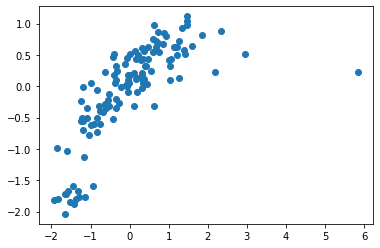

In [76]:
#Gráfica del resultado obtenido del modelo
plt.scatter(y_test,y_pred)